## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# you code here

In [1]:
import numpy as np

In [2]:
random_data = np.random.random((20, 2))

In [3]:
import matplotlib.pyplot as plt

In [4]:
X = random_data[:, 0]  #X[:,0]就是取所有行的第0个数据, X[:,1] 就是取所有行的第1个数据

In [5]:
import random

In [6]:
def assmuing_function(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

In [7]:
y = [assmuing_function(x) for x in X]

In [8]:
y = np.array(y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)
#fit()就是求得训练集X的均值啊，方差啊，最大值啊，最小值啊这些训练集X固有的属性。可以理解为一个训练过程
#reshape(-1,1)表示（任意行，1列）

In [11]:
def f(x):
    return reg.coef_ * x + reg.intercept_
#coef_直线的斜率、intercept_截距

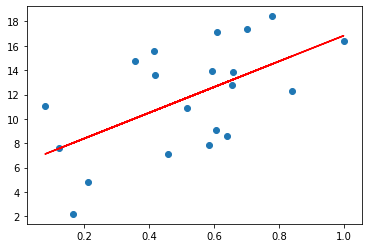

In [12]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [13]:
reg.predict([[1]])

array([16.84357199])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [2]:
# you code here

In [14]:
def knn_model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]
#zip将对象打包成元组

In [15]:
from scipy.spatial.distance import cosine

In [16]:
def distance(x1, x2):
    return cosine(x1, x2)

In [17]:
def predict(x, k=5):
    most_similars = sorted(knn_model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    y_hats = [_y for x, _y in most_similars]
    print(most_similars)
    return np.mean(y_hats)

In [18]:
predict(1)

[(0.6061487057344294, 9.122392656841354), (0.4598150413783919, 7.1615215544704505), (0.5850478636474047, 7.839641372875224), (0.9984222465854806, 16.378858104245438), (0.3571540366370751, 14.785864090936807)]


11.057655555873854

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [3]:
# you code here

In [19]:
from collections import Counter

In [20]:
from icecream import ic

In [21]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)
#set() 函数创建一个无序不重复元素集

In [22]:
entropy([1, 1, 1, 0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [70]:
mock_data = {
    'gender': ['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [24]:
import pandas as pd

In [71]:
dataset = pd.DataFrame.from_dict(mock_data)

In [72]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [48]:
# split by gender:
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))
# income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))
# family_number:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))
# pet
#print(entropy([1, 1, 1, 1]) + entropy([0, 0, 0]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


In [49]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    print(x_fields)
    
    spliter = None
    min_entropy = float('inf')
    print(min_entropy)
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [73]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]


{'income', 'family_number', 'gender'}
inf


ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [74]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [75]:
find_the_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]


{'income', 'family_number', 'gender'}
inf


ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128


spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [76]:
dataset[dataset['family_number'] != 2][dataset['income'] == '+10']

/Users/orange/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [77]:
find_the_optimal_spilter(dataset[dataset['family_number'] != 2][dataset['income'] == '+10'], 'bought')

/Users/orange/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2:

{'income', 'family_number', 'gender'}
inf


 0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [33]:
from sklearn.cluster import KMeans

In [34]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

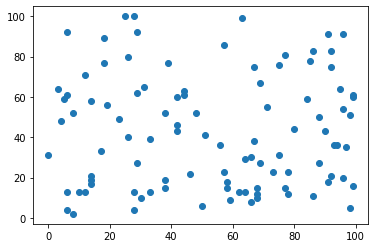

In [35]:
plt.scatter(X1, X2)

In [36]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [37]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [38]:
cluster.fit(tranning_data)
#fit()简单来说，就是求得训练集X的均值啊，方差啊，最大值啊，最小值啊这些训练集X固有的属性。可以理解为一个训练过程

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
cluster.cluster_centers_

array([[82.23529412, 75.52941176],
       [65.7826087 , 19.08695652],
       [92.85714286, 32.57142857],
       [38.        , 53.57142857],
       [14.73333333, 73.26666667],
       [19.11764706, 15.70588235]])

In [40]:
cluster.labels_

array([1, 2, 0, 3, 1, 5, 5, 2, 4, 0, 0, 0, 3, 2, 1, 3, 2, 1, 0, 4, 4, 5,
       3, 0, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 2, 0, 5, 4, 1, 3, 4, 1, 0, 0,
       3, 2, 1, 1, 0, 3, 0, 1, 4, 4, 1, 0, 5, 3, 5, 4, 1, 2, 1, 2, 2, 1,
       3, 3, 5, 1, 5, 0, 3, 4, 2, 5, 5, 5, 1, 3, 4, 2, 4, 5, 3, 0, 2, 1,
       1, 4, 2, 4, 4, 5, 3, 2, 0, 0, 0, 4], dtype=int32)

In [41]:
from collections import defaultdict

In [42]:
centers = defaultdict(list) #defaultdict的作用是在于，当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值

In [43]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

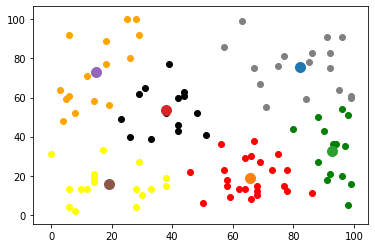

In [44]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers): #enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    for location in centers[c]:
        plt.scatter(*location, c=color[i])

for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

所谓model是对现实的简化，但不能完美的解释所有的现象，所以没有完全正确的模型，但在特定假设条件下，这个model就是对的，可以用来解决问题。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

过拟合(overfitting)是在模型参数拟合过程中的问题，由于训练数据包含抽样误差，训练时，复杂的模型将抽样误差也考虑在内，将抽样误差也进行了很好的拟合。一味追求提高对训练数据的预测能力，所得到模型的复杂度往往比真实模型要高。
欠拟合(underfitting)就是学习器没有很好地学到训练样本的一般性质，不能够很好地拟合数据，所以不论在训练数据还是测试数据中表现都很差。当模型过于简单时会发生欠拟合，由于太少的特征或太多的正则化而导致，这使得从数据集中学习变得不灵活。

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

precision：准确率，所有‘是’的预测且正确的个数/所有‘是’的预测个数。
recall：召回率，所有‘是’的预测且正确的个数/所有真正标签是‘是’的个数。
Precision和Recall这两者往往是相互矛盾的。
F1 Score，是统计学中用来衡量二分类模型精确度的一种指标。它同时兼顾了分类模型的精确率和召回率。召回率和精确率都很重要，权重相同。
F2 Score，则认为召回率更加重要。
AUC（Area Under Curve）被定义为ROC曲线下的面积(ROC的积分)，通常大于0.5小于1。随机挑选一个正样本以及一个负样本，分类器判定正样本的值高于负样本的概率就是 AUC 值。AUC值(面积)越大的分类器，性能越好。

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习相对传统编程方法而言，其优势在于首先可以通过机器学习算法简化代码，提高代码的执行能力，其次对于采用传统方法无法解决的问题可以通过机器学习技术找到一个解决方案。再者，机器学习可以适应新的数据的变化，就是可以根据环境的不同实现系统个性化。最后，可以通过机器学习算法从海量的数据中寻找数据的潜在的规律和价值。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

这句话是正确的。模型评估很重要，因为一般来说，我们针对一个问题会有很多个模型可以解决，那么我们应该用哪个模型？在测试模型的泛化能力时，我们怎么定义这个模型的泛化能力好不好，或者说我们怎么判断得到的模型好不好，下一次训练会不会比上一次训练得到的模型更好，这些都需要一些指标去指出当下的模型的性能。这就是模型评价的意义所在。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [90]:
# you code here
def probability(elements, value):
    counter = Counter(elements)
    probs = counter[value] / len(elements)
    return probs
def subspilter(training_data, target):
    return training_data[target].tolist()
def predicate(gender, income, family_number):
    dic = {'gender': gender, 'income': income, 'family_number': family_number}
    bought = 0
    spilter_ar = []
    training_data = dataset
    while True:
        optimal_spilter = find_the_optimal_spilter(training_data=training_data, target='bought')
        spilter_key, spilter_value = optimal_spilter[0], optimal_spilter[1]
        if spilter_key in spilter_ar:
            break
        else:
            if dic.get(spilter_key) == spilter_value:
                optimal_spileter = training_data[training_data[spilter_key] == spilter_value]
                prob = probability(subspilter(optimal_spileter, 'bought'), 1)
                if prob > 0.5:
                    bought = 1
                    break
        training_data = training_data[training_data[spilter_key] != spilter_value]
    return bought

In [91]:
predicate('M', '-10', 1)

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic|

{'income', 'family_number', 'gender'}
inf


 values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565
{'income', 'family_number', 'gender'}
inf


ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128


spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

In [92]:
from sklearn.datasets import load_boston
import random

In [93]:
dataset = load_boston()

In [94]:
x,y=dataset['data'],dataset['target']

In [95]:
X_rm = x[:,5]

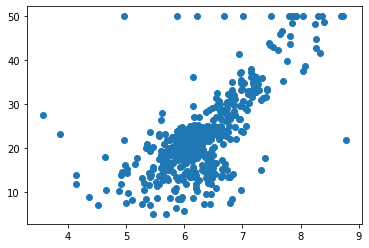

In [104]:
plt.scatter(X_rm,y)

In [96]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [97]:
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [109]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i > y_hat_i:
            gradient += (-x_i)
        else:
            gradient += x_i
    return gradient / n

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i > y_hat_i:
            gradient += -1
        else:
            gradient += 1
    return gradient / n

In [110]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 456.91937244410985, parameters k is -73.06834293944011 and b is 24.82125454401863
Iteration 1, the loss is 456.8788758147268, parameters k is -73.06205830505276 and b is 24.82225454401863
Iteration 2, the loss is 456.83837918534476, parameters k is -73.0557736706654 and b is 24.82325454401863
Iteration 3, the loss is 456.7978825559615, parameters k is -73.04948903627805 and b is 24.824254544018633
Iteration 4, the loss is 456.757385926579, parameters k is -73.04320440189069 and b is 24.825254544018634
Iteration 5, the loss is 456.7168892971966, parameters k is -73.03691976750333 and b is 24.826254544018635
Iteration 6, the loss is 456.6763926678139, parameters k is -73.03063513311598 and b is 24.827254544018636
Iteration 7, the loss is 456.6358960384311, parameters k is -73.02435049872862 and b is 24.828254544018638
Iteration 8, the loss is 456.5953994090487, parameters k is -73.01806586434127 and b is 24.82925454401864
Iteration 9, the loss is 456.554902779665

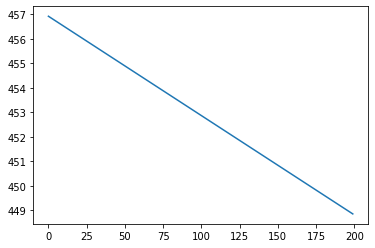

In [111]:
plt.plot(list(range(iteration_num)),losses)

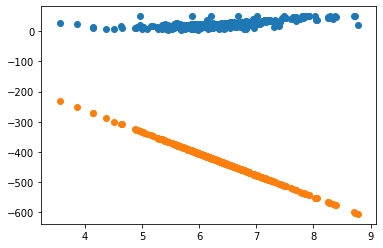

In [112]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)